# Hypothesis Testing with Insurance Data (Core)

Tijesunimi Odebode

5/8/2022

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Q1. Do smokers have higher insurance charges than non-smokers?

   ### 1. State your Null Hypothesis and Alternative Hypothesis

<b> Null hypothesis: 
    
    Smokers do not have higher insurance charges than non-smokers.

<b> Alternate hypothesis: 
    
    Smokers have higher insurance charges than non-smokers.
    
<b> Alpha: 
    
    We will use an alpha=.05

### 2. Select the correct test according to the data type and number of samples

- I will use the 2 Sample T-Test

### 3. Test the assumptions of your selected test.

In [2]:
df = pd.read_csv('insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
smoker_insurance = df.loc[df['smoker']=='yes',['charges', 'smoker']]
nonsmoker_insurance = df.loc[df['smoker']=='no',['charges', 'smoker']]
## Getting means for smoker and non-smoker charges
print(f"There are {len(smoker_insurance)} smokers." )
print(f"There are {len(nonsmoker_insurance)} non-smokers." )

There are 274 smokers.
There are 1064 non-smokers.


- From the above, we can see that there are 274 smokers 

- There are 1064 non-smokers 

In [5]:
display(smoker_insurance.head(), nonsmoker_insurance.head())

,charges,smoker
0,16884.9240,yes
11,27808.7251,yes
14,39611.7577,yes
19,36837.4670,yes
23,37701.8768,yes


,charges,smoker
1,1725.55230,no
2,4449.46200,no
3,21984.47061,no
4,3866.85520,no
5,3756.62160,no


In [6]:
# Visualize Group Means
## concatenate the two dataframes for visualziation.
plot_df = pd.concat([smoker_insurance, nonsmoker_insurance], axis=0)
plot_df

,charges,smoker
0,16884.9240,yes
11,27808.7251,yes
14,39611.7577,yes
19,36837.4670,yes
23,37701.8768,yes
...,...,...
1332,11411.6850,no
1333,10600.5483,no
1334,2205.9808,no
1335,1629.8335,no


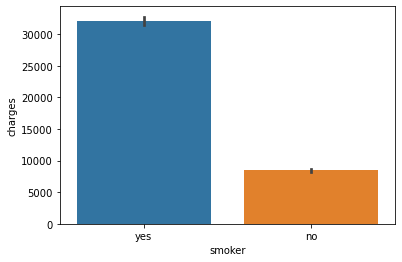

In [7]:
## visualizing means. 
ax = sns.barplot(data=plot_df, x='smoker', y='charges', ci=68)

- - We can see from the above graph that smokers have higher insurance charges than non-smokers, on average.

In [8]:
# Let's save final 'smoker_charges' and 'nonsmoker_charges' groups 
# that are a pandas Series. 

smoker_charges = smoker_insurance['charges']
nonsmoker_charges = nonsmoker_insurance['charges']
display(smoker_charges.head(), nonsmoker_charges.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

<b> a. Testing for Outliers

In [9]:
zscores_smoker = stats.zscore(smoker_charges)
outliers_smoker = abs(zscores_smoker)>3
np.sum(outliers_smoker)

0

In [10]:
zscores_nonsmoker = stats.zscore(nonsmoker_charges)
outliers_nonsmoker = abs(zscores_nonsmoker)>3
np.sum(outliers_nonsmoker)

24

- There are no outliers for the "smoker_charges" data.
- There are outliers for the "nonsmoker_charges" data

We will drop the outliers in the "nonsmoker_charges" data

In [11]:
nonsmoker_charges = nonsmoker_charges.loc[~outliers_nonsmoker]
nonsmoker_charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

- We have dropped the outliers in the "nonsmoker_charges" data

<b> b. Test Each Group for Normality

In [12]:
# normal test males
result_smoker = stats.normaltest(smoker_charges)
result_smoker

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [13]:
# normal test females
result_nonsmoker = stats.normaltest(nonsmoker_charges)
result_nonsmoker

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

- For both the smoker and non-smoker groups, the p-value is less than 0.05 so we can assume these are NOT normal distributions.

- We will proceed since we have a large sample.

<b> c. Testing for Equal Variance with Levene's test

In [14]:
result = stats.levene(smoker_charges, nonsmoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

- From the above, we can say that we don't have equal variances. As a result, we will include "equal_var = False" when we perform our t-test.

### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [15]:
# Independent t-test with equal_var set to False
result1 = stats.ttest_ind(smoker_charges, nonsmoker_charges, equal_var = False)
result1



Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

### 5. Interpret your p-value and reject or fail to reject your null hypothesis 

- Since our p value in the independent t-test is < alpha (0.05), we can reject the null hypothesis and accept that smokers have higher insurance charges than non-smokers

### 6. Show a supporting visualization that helps display the result

In [16]:
smoker_insurance.loc[~outliers_smoker]

,charges,smoker
0,16884.92400,yes
11,27808.72510,yes
14,39611.75770,yes
19,36837.46700,yes
23,37701.87680,yes
...,...,...
1313,36397.57600,yes
1314,18765.87545,yes
1321,28101.33305,yes
1323,43896.37630,yes


In [17]:
nonsmoker_insurance.loc[~outliers_nonsmoker]

,charges,smoker
1,1725.55230,no
2,4449.46200,no
3,21984.47061,no
4,3866.85520,no
5,3756.62160,no
...,...,...
1332,11411.68500,no
1333,10600.54830,no
1334,2205.98080,no
1335,1629.83350,no


,charges,smoker
0,16884.9240,yes
11,27808.7251,yes
14,39611.7577,yes
19,36837.4670,yes
23,37701.8768,yes


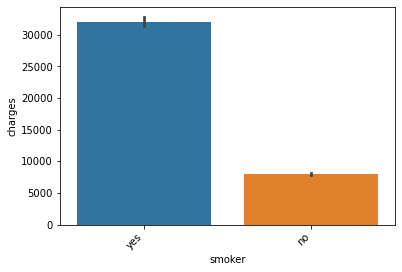

In [18]:
## concatenate the two dataframes for visualziation.
plot1_df = pd.concat([smoker_insurance.loc[~outliers_smoker], 
                      nonsmoker_insurance.loc[~outliers_nonsmoker]], axis=0)
display(plot1_df.head())
ax = sns.barplot(data=plot1_df, x= 'smoker', y='charges', ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation='45', ha='right');

- We can see from the above visualization that smokers have higher insurance charges.

## Q2. Are men more likely to smoke than women?

   ### 1. State your Null Hypothesis and Alternative Hypothesis

<b> Null hypothesis: 
    
    Men are not more likely to smoke than women.

<b> Alternate hypothesis: 
    
    Men are more likely to smoke than women.
    
<b> Alpha: 
    
    We will use an alpha=.05

### 2. Select the correct test according to the data type and number of samples

- I will use the Chi-squared test

### 3. Test the assumptions of your selected test.

In [19]:
df = pd.read_csv('insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Let's visualize smokers/non-smokers by sex

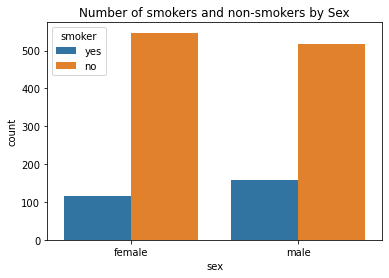

In [20]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smokers and non-smokers by Sex");

It is obvious that our data passes the following two assumptions for using a Chi-Square test:

- There are two categorical variables (ordinal or nominal)

- The outcomes are independent

### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

Let's get the Contingency Table

In [21]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [22]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [23]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

- Since the p-value is less than 0.05, we can say that we have a significant result.

### 5. Interpret your p-value and reject or fail to reject your null hypothesis 

Since our p < .05, we reject the null hypothesis that men are not more likely to smoke than women. In other words, we accept the alternate hypothesis and conclude that men are more likely to smoke than women.

### 6. Show a supporting visualization that helps display the result

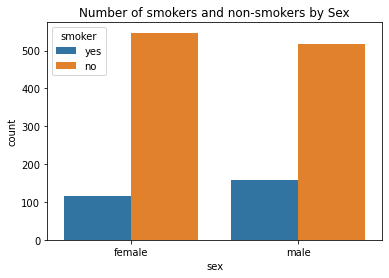

In [24]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smokers and non-smokers by Sex");

- We can see from the above visualization that there is a higher number of men that smoke than women

In [25]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'], normalize='index')
table

smoker,no,yes
sex,,
female,0.826284,0.173716
male,0.764793,0.235207


## Q3. Do different regions have different charges, on average?

In [26]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\tijes\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


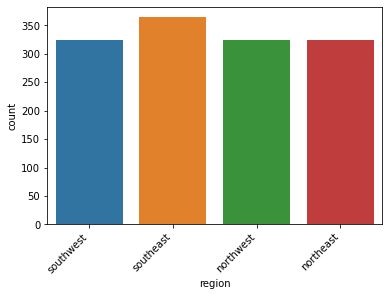

In [27]:
ax = sns.countplot(df['region'])
ax.set_xticklabels(ax.get_xticklabels(), rotation='45', ha='right');

   ### 1. State your Null Hypothesis and Alternative Hypothesis

<b> Null hypothesis: 
    
    Different regions do not have different charges, on average. Different regions all have the same charges, on average.

<b> Alternate hypothesis: 
    
    Different regions have different charges, on average. 

    
<b> Alpha: 
    
    We will use an alpha=.05

### 2. Select the correct test according to the data type and number of samples

- I will use the ANOVA Test

### 3. Test the assumptions of your selected test.

In [28]:
## Create groups dictionary. There are only 4 groups
groups = {}
## Loop through all unique categories
for region in df['region'].unique():
    ## Get series for group 
    temp = df.loc[df['region']==region,'charges'].copy()
    
    # save into the dictionary
    groups[region] = temp
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [29]:
groups['southwest']

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

<b> a. Testing for Outliers

In [30]:
for region, data in groups.items():

    outliers = np.abs(stats.zscore(data)) > 3
    print(f"There were {outliers.sum()} outliers in the {region} group.")

    data = data.loc[~outliers]
    groups[region] = data

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


<b> b. Check for Normality

In [31]:
## Running normal test on each group and confirming there are >15 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p}
pd.DataFrame(norm_results).T

,n,p
southwest,317.0,7.728611e-22
southeast,362.0,1.936990e-13
northwest,318.0,2.940543e-19
northeast,320.0,3.557877e-17


In [32]:
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df['sig?'] = norm_results_df['p'] < .05
norm_results_df

,n,p,sig?
southwest,317.0,7.728611e-22,True
southeast,362.0,1.936990e-13,True
northwest,318.0,2.940543e-19,True
northeast,320.0,3.557877e-17,True


- For each group, the p-value is less than 0.05 so we can assume these are NOT normal distributions.

- We will proceed since we have a large sample.

<b> c. Testing Assumption of Equal Variance

In [33]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

- Since our p-value was <.05 we reject the null hypothesis that the samples come from populations with equal variances. We accept that our groups DO NOT have equal variance.

### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

<b> Hypothesis Test - Kruskal Wallice

In [34]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)


False

Our Kruskal Wallis test returned a p-value greater than .05. We fail to reject the null hypothesis and conclude that different regions all have the same charges, on average..

Let's run a Post-Hoc Multiple Comparison Test to get a p-value for every possible combination of 2 groups.

In [35]:
values = df['charges']
labels = df['region']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


- For each comparison of two groups in the table above, wherever we see 'True' under the 'reject' column, it means that we are rejecting the null hypothesis and concluding that those two regions regions had different charges, on average.

- For each comparison of two groups in the table above, wherever we see 'False' under the 'reject' column, it means that we are failing to reject the null hypothesis and concluding that those two regions do not have different charges, on average.

### 5. Interpret your p-value and reject or fail to reject your null hypothesis 

- Our Kruskal Wallis test returned a p-value greater than .05. We fail to reject the null hypothesis and conclude that different regions all have the same charges, on average.

- For each comparison of two groups in the table above, wherever we see 'True' under the 'reject' column, it means that we are rejecting the null hypothesis and concluding that those two regions had different charges, on average.

- For each comparison of two groups in the table above, wherever we see 'False' under the 'reject' column, it means that we are failing to reject the null hypothesis and concluding that those two regions do not have different charges, on average.

### 6. Show a supporting visualization that helps display the result

In [36]:
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


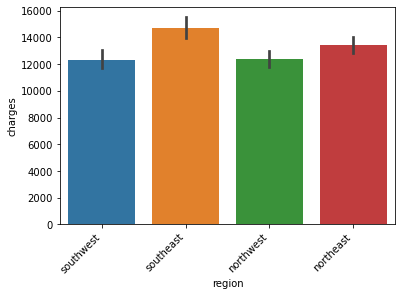

In [37]:
ax = sns.barplot(data=df, x='region', y='charges', ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation='45', ha='right');

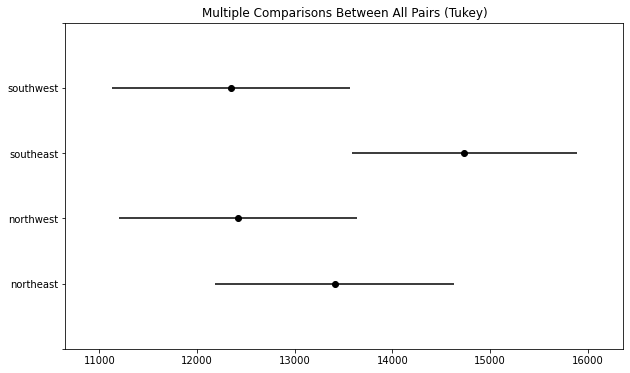

In [38]:
tukeys_results.plot_simultaneous();

- From the above visualizations, for southeast and southwest,  we are rejecting the null hypothesis and concluding that southeast and southwest had different charges, on average.